# Ecuaciones Diferenciales para ingeniería BAIN081

## Ecuaciones diferenciales de primer orden 


Una ecuación diferencial es una ecuación donde hay involucrado un operador diferencial y la incognita es una función.Un ejemplo clásico es la ecuación: 
$$\begin{equation}
y(x)=\dfrac{dy}{dx}(x)
\label{ec1}
\end{equation}$$

en esta ecuación, deseamos encontrar una función $y(x)$ que sea igual a su derivada. De calculo I sabemos que la derivada de la función $y(x)=e^x$ es $\frac{dy(x)}{dx}=e^x$, por lo tanto $y(x)=e^x$ es una solución de ecuación diferencial anterior. También lo es $y(x)=2e^x$, $y(x)=3e^x$, $y(x)=100e^x$. En general la solución es $y(x)=Ce^x,\ \forall C\in \mathbb{R}$.

Para resolver una ecuación diferencial usaremos la librería simbólica de python $\textbf{sympy}$, para usar la librería debemos importar la librería de la sigiuente forma: $\textbf{import sympy}$, si además queremos darle un anacrónimo podemos escribir $\textbf{import sympy as sym}$. 



In [1]:
import sympy as sym

para declarar una variable simbólica $x$ y una función simbólica $y(x)$, debemos usar los objetos $\textbf{Symbol}$ y $\textbf{Function}$, de la siguiente manera: 

In [2]:
x=sym.Symbol('x')
y=sym.Function('y')

 Para declarar la ecuación diferencia $y=y'$, usando el objeto simbólico $\textbf{Eq}$ de $\textbf{sympy}$, 

In [3]:
ec1=sym.Eq(y(x)-y(x).diff(x),0)
ec1

Eq(y(x) - Derivative(y(x), x), 0)

Para resolver la ecuación, simplemente, llamamos a la función $\textbf{dsolve}$ de $\textbf{sympy}$ que resuelve ecuaciones diferenciales y tiene por parámetro de entrada la ecuación que declaramos anteriormente. 

In [4]:
solucion=sym.dsolve(ec1)
solucion

Eq(y(x), C1*exp(x))

Si deseamos graficar, punto a punto, una solución en particular por ejemplo cuando $C_1=1$ podemos utilizar la función $\textbf{matplotlib}$ de $\textbf{pyplot}$. Por lo tanto importaremor la librería $\textbf{matplotlib.pyplot}$ con el anacrónimo $\textbf{plt}$. Para trabajar con arreglos(vectores), necesitaremos la librería $\textbf{numpy}$. 

In [5]:
import matplotlib.pyplot as plt
import numpy as np

Los vectores $xp=[xp_1,...xp_n]^t$ y $yp=[yp_1,...,yp_n]^t$ forman el conjunto de pares ordenados $\{(xp_i,yp_i)\}_{i=1}^n$, con los cuales generaremos la gáfica de la función $y(x)=e^x$. En $\textbf{python}$ podemos declarar el vector $xp=[0,0.1,0.2,0.3,....,9.9,10]^t$ usando la función $\textbf{arange}$ de $\textbf{numpy}$. Para determinar la imagen de la función $y(x)=e^x$, usamos la función exponencial de $\textbf{numpy}$.   

In [6]:
xp=np.arange(0,10,0.1)
yp=np.exp(xp)

para gráficar usamos la función $\textbf{plot}$ y $\textbf{show}$. 

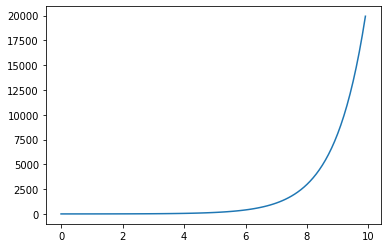

In [7]:
plt.plot(xp,yp)
plt.show()

Una forma más sencilla para graficar, es usando la librería simbólica $\textbf{simpy}$, mediante la función $\textbf{plot}$.

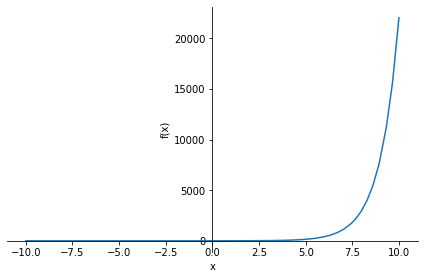

In [8]:
sym.plot(sym.exp(x))

En ambos caso solo graficamos la solución cuando $C_1=1$, para graficar la familia de soluciones $y(x)=C_1e^x$, debemos graficar para diversos valores de $C_1$, por ejemplo para $C_1=0,\ C_1=1,.......$. Por lo tanto crearemos un arreglo de gráficas y luego las mostraremos todas juntas.  Antes de eso debemos escribir la solución de la Edo como una función lambda de octave. 

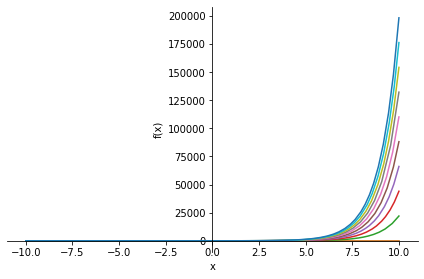

In [9]:
#### Arreglo de graficas
Graficas=sym.plot(0*sym.exp(x),show=False) ## Inicializamos Grafica con una grafica. 
for Ci in np.arange(0,10,1):
    Graficas.extend(sym.plot(Ci*sym.exp(x),show=False))##Agregamos cada gráfica, a Gráficas. 
Graficas.show() ## Mostramos el arreglo de gráficas

### Ejercicios: 
Resuelva las siguientes ecuaciones diferenciales y grafique la familia de soluciones correspondiente.

(a) $xy'-y\tan(\ln(y))=0$ 

(b) $y=\frac{1}{4}y'x-1$


In [10]:
##### Solución (a)
import sympy as sym
x=sym.Symbol('x')
y=sym.Function('y')
ec_a=sym.Eq(x*y(x).diff(x)-y(x)*sym.tan(sym.ln(y(x))),0)
ec_a ### Para verificar que escribimos la ecuación correcta.

Eq(x*Derivative(y(x), x) - y(x)*tan(log(y(x))), 0)

In [11]:
solucion=sym.dsolve(ec_a)## resolvemos la ecuación diferencial.
print(solucion)##mostramos la solución.

[Eq(y(x), exp(-atan(x*sqrt(-C1/(C1*x**2 - 1))))), Eq(y(x), exp(atan(x*sqrt(-C1/(C1*x**2 - 1)))))]


Notemos que la solución es un arreglo de ecuaciones (las dos ramas de la solución), si queremos que se muestre una rama simplificada de la solución, podemo aplicar el comando $\textbf{simplify}$, a una componente del arreglo. 

In [12]:
sym.simplify(solucion[0])

Eq(y(x), exp(-atan(x*sqrt(-C1/(C1*x**2 - 1)))))

In [13]:
sym.simplify(solucion[1])

Eq(y(x), exp(atan(x*sqrt(-C1/(C1*x**2 - 1)))))

Para poder graficar alguna de las soluciones debemos tener en cuenta que el dominio de la solución depende de $c_1$, de la siguiente manera: 

$$-\sqrt{\frac{1}{c_1}} \leq x \leq \sqrt{\frac{1}{c_1}} $$ 

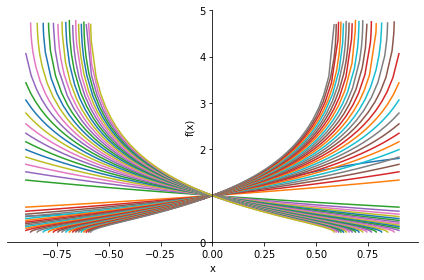

In [34]:
#### Arreglo de graficas
Graficas=sym.plot(sym.exp(sym.atan(x*sym.sqrt(1/(x**2+1)))),(x,-0.9,0.9),show=False)##Inicializamos Grafica con una grafica tomando c1=1. 
for C1 in np.arange(0.1,3,0.1):
    Graficas.extend(sym.plot(sym.exp(sym.atan(x*sym.sqrt(-C1/(C1*x**2-1)))),(x,-0.9,0.9),show=False))##Agregamos cada gráfica, a Gráficas. 
    Graficas.extend(sym.plot(sym.exp(-sym.atan(x*sym.sqrt(-C1/(C1*x**2-1)))),(x,-0.9,0.9),show=False))
Graficas.show() ## Mostramos el arreglo de gráficas

In [25]:
##### Solución (b)
import sympy as sym
x=sym.Symbol('x')
y=sym.Function('y')
ec_b=sym.Eq(y(x),1/4*y(x).diff(x)*x-1)
ec_b ### Para verificar que escribimos la ecuación correcta.

Eq(y(x), 0.25*x*Derivative(y(x), x) - 1)

In [16]:
solucion=sym.dsolve(ec_b)## resolvemos la ecuación diferencial.
solucion##mostramos la solución.

Eq(y(x), C1*x**4.0 - 1.0)

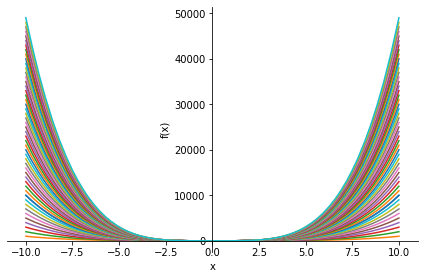

In [35]:
#### Arreglo de graficas
Graficas=sym.plot(1*x**4-1,show=False)##Inicializamos Grafica con una grafica tomando c1=1. 
for Ci in np.arange(0.1,5,0.1):
    Graficas.extend(sym.plot(Ci*x**4-1,show=False))##Agregamos cada gráfica, a Gráficas. 
Graficas.show() ## Mostramos el arreglo de gráficas

*) Para estudiar distintas formas de construir graficos usando variable simbólica: https://docs.sympy.org/latest/modules/plotting.html

*) Para estudiar como utilizar variables simbólicas en python: https://docs.sympy.org/latest/index.html